In [1]:
#import data
import pandas as pd
data=pd.read_csv("C:/Users/User/Documents/super.csv",encoding="ISO-8859-1")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
#COLOR mapping
color_map={
    'Consumer':'blue',
    'Corporate':'yellow',
    'Home Office':'red'
}
data['color']=data['Segment'].map(color_map)
data['color'].head()

0      blue
1      blue
2    yellow
3      blue
4      blue
Name: color, dtype: object

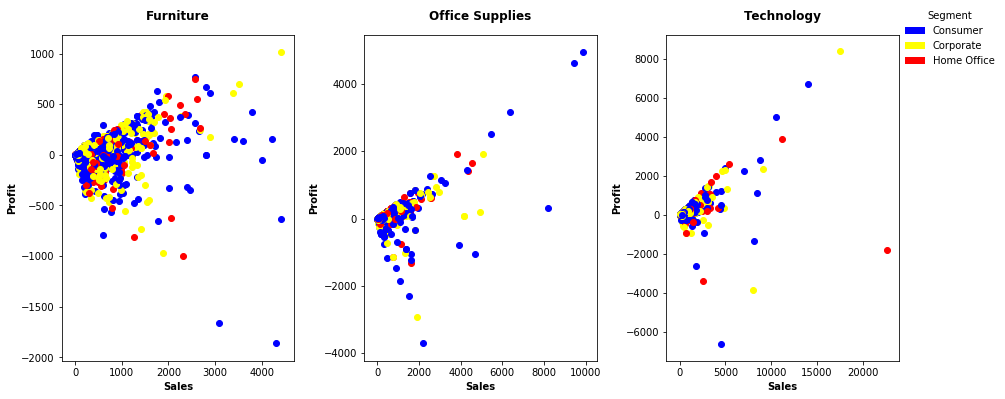

In [9]:
from matplotlib import pyplot as plt
#definisikan subplot baris dan kolom
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,6))
cat=data['Category'].unique().tolist()
#membuat plot subplot
for k,l in zip(cat,range(3)):
    data_am=data[data['Category']==k]
    for i,j in data_am.iterrows():
        ax[l].scatter(j['Sales'],j['Profit'],color=j['color'])
    ax[l].set_title(k,pad=15,fontweight='bold')
    ax[l].set_ylabel('Profit',fontweight='bold')
    ax[l].set_xlabel('Sales',fontweight='bold')
#membuat jarak antar subplot
fig.subplots_adjust(wspace=0.3)
#membuat custom legend
li=[]
import matplotlib.patches as patches
for i in data['Segment'].unique().tolist():
    legend=patches.Patch(facecolor=color_map[i],label=i)
    li.append(legend)
plt.legend(handles=li,loc='upper right',title='Segment',bbox_to_anchor=(1.45,1.1),frameon=False)
    

- dari gambar diatas profit pada categori teknologi lebih tinggi dibandingkan dengan furniture dan office supplies
- barang office supplies paling banyak dibeli oleh segmen consumer
- kategori furniture banyak dibeli oleh segment konsumen pada superstore ini

**profit vs sales pada 4 region berdasarkan mssing-masing kategori customer**

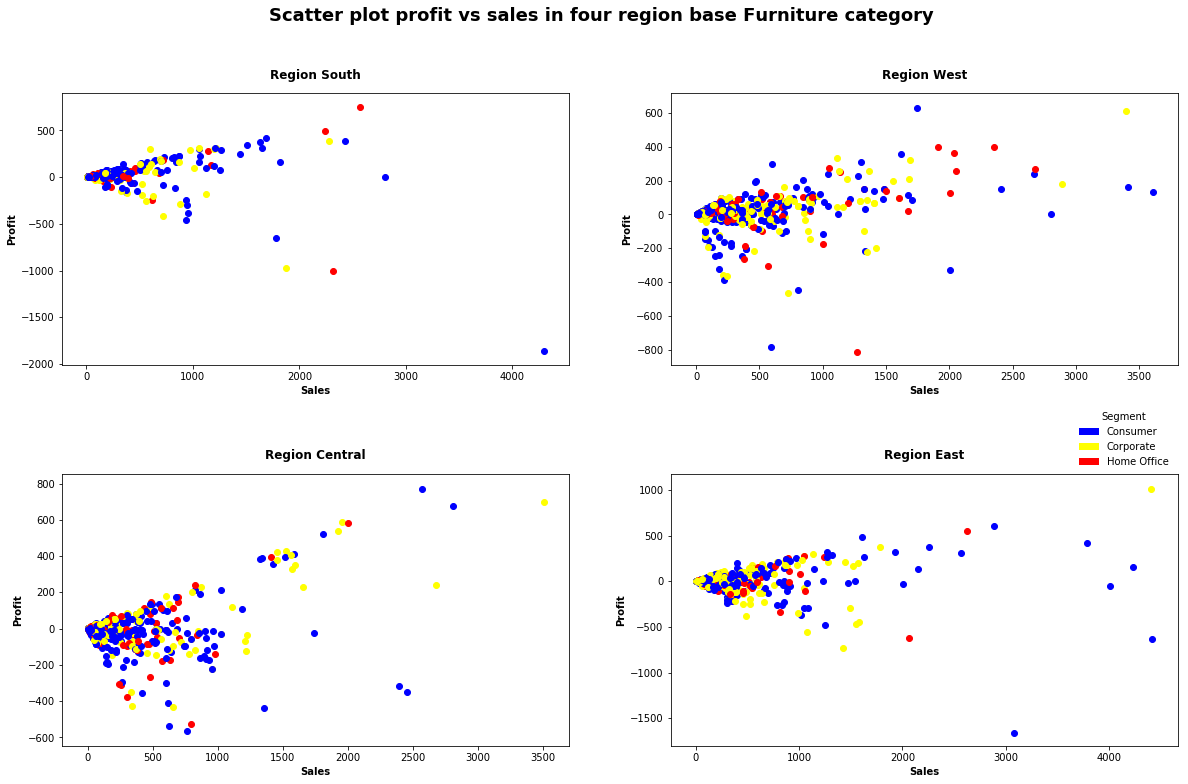

In [15]:
#region di USA
region=data['Region'].unique().tolist()
#akan melihat berdasarkan categori furniture
fig,ax=plt.subplots(2,2,figsize=(20,12))
for (i,j),k in zip([(i,j) for i in range(2) for j in range(2) ],region):
    ambil=data[(data['Region']==k) & (data['Category']=='Furniture')]
    for l,m in ambil.iterrows():
        ax[i][j].scatter(m['Sales'],m['Profit'],color=m['color'])
    ax[i][j].set_title(f"Region {k}",pad=15,fontweight='bold')
    ax[i][j].set_xlabel("Sales",fontweight='bold')
    ax[i][j].set_ylabel("Profit",fontweight='bold')
plt.suptitle('Scatter plot profit vs sales in four region base Furniture category',fontweight='bold',fontsize=18)
fig.subplots_adjust(hspace=0.4)
li=[]
import matplotlib.patches as patches
for i in data['Segment'].unique().tolist():
    legend=patches.Patch(facecolor=color_map[i],label=i)
    li.append(legend)
plt.legend(handles=li,loc='upper right',title='Segment',bbox_to_anchor=(1,1.26),frameon=False)

- wilayah tengah US memiliki jumlah profit dan sales yang positif hubungannya untuk tipe segment consumer
- Profit yang didapat tidak affordable terhadapa sales terdapat pada wilayah east
- region south memilki jumlah barang furniture yang paling sedikit di pesan dan wilayah central memiliki julah barang furniture terbesar

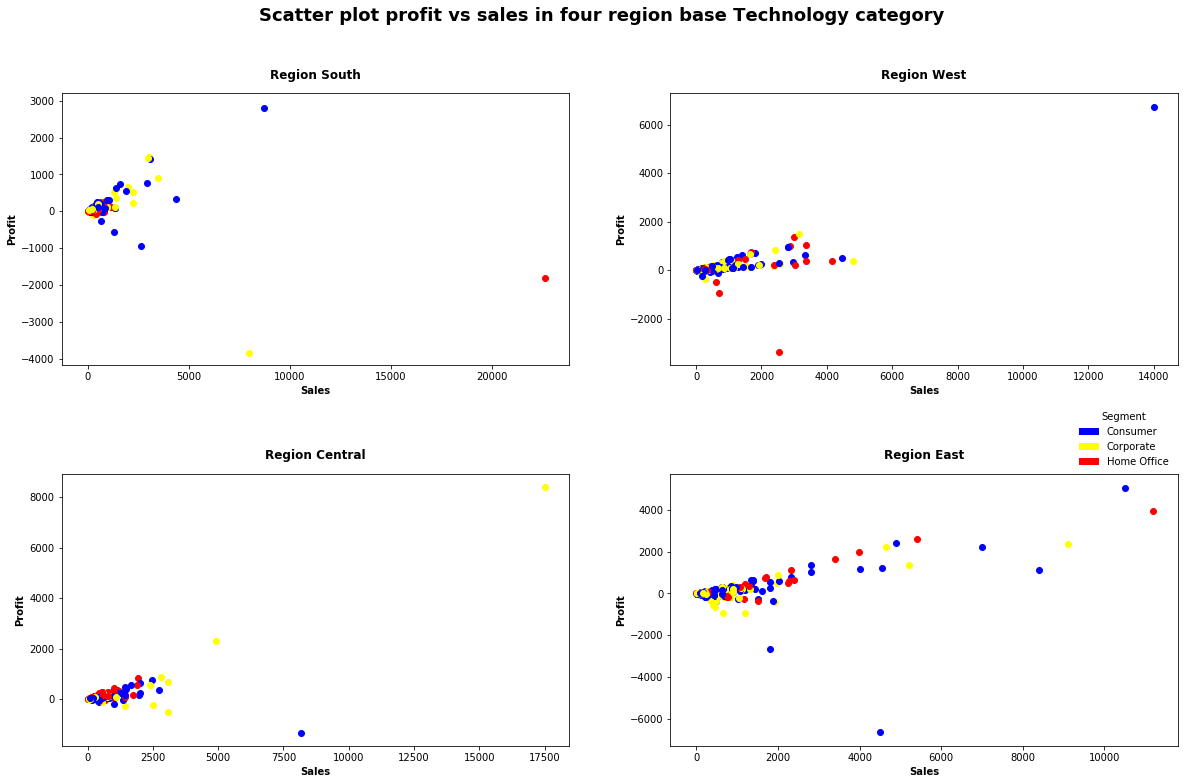

In [16]:
#region di USA
region=data['Region'].unique().tolist()
#akan melihat berdasarkan categori technology
fig,ax=plt.subplots(2,2,figsize=(20,12))
for (i,j),k in zip([(i,j) for i in range(2) for j in range(2) ],region):
    ambil=data[(data['Region']==k) & (data['Category']=='Technology')]
    for l,m in ambil.iterrows():
        ax[i][j].scatter(m['Sales'],m['Profit'],color=m['color'])
    ax[i][j].set_title(f"Region {k}",pad=15,fontweight='bold')
    ax[i][j].set_xlabel("Sales",fontweight='bold')
    ax[i][j].set_ylabel("Profit",fontweight='bold')
plt.suptitle('Scatter plot profit vs sales in four region base Technology category',fontweight='bold',fontsize=18)
fig.subplots_adjust(hspace=0.4)
li=[]
import matplotlib.patches as patches
for i in data['Segment'].unique().tolist():
    legend=patches.Patch(facecolor=color_map[i],label=i)
    li.append(legend)
plt.legend(handles=li,loc='upper right',title='Segment',bbox_to_anchor=(1,1.26),frameon=False)

- Barang teknologi memiliki korelasi yang positif antara profit dan sales pada wilayah south dan east
- Tipe barang teknologi sedikit dipesan di bagian central USA

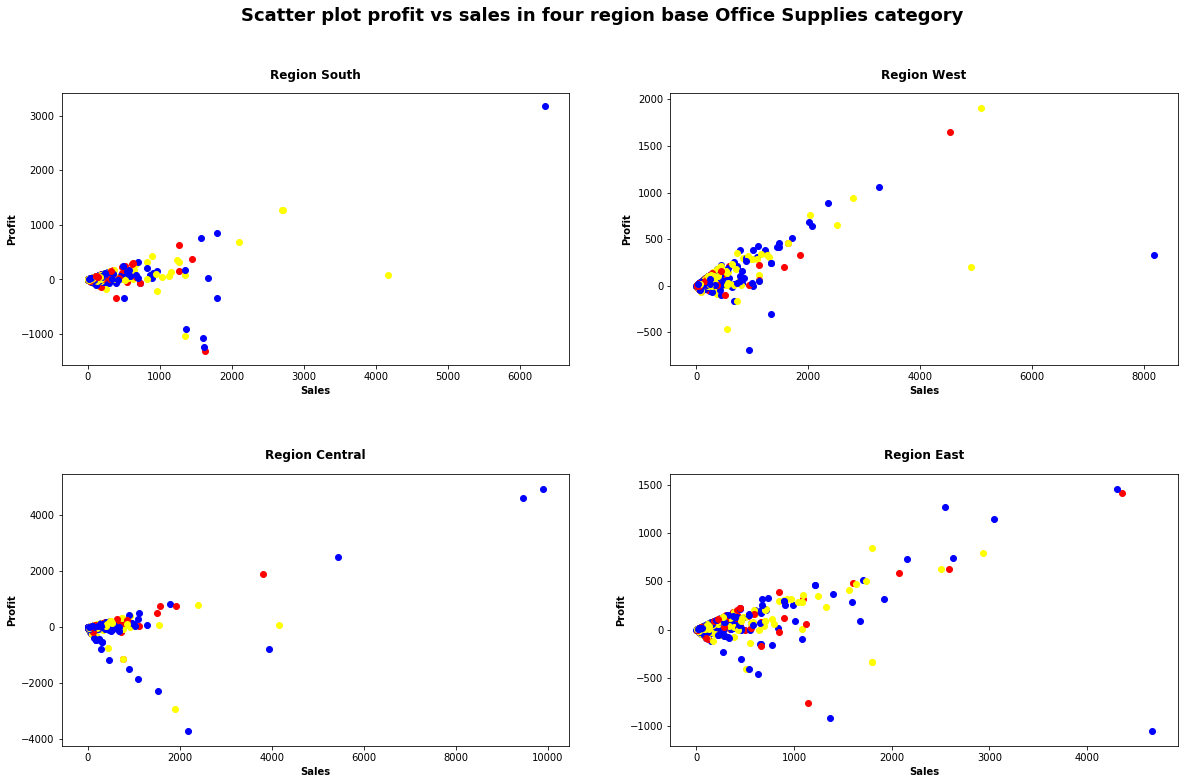

In [6]:
#region di USA
region=data['Region'].unique().tolist()
#akan melihat berdasarkan categori office supplies
fig,ax=plt.subplots(2,2,figsize=(20,12))
for (i,j),k in zip([(i,j) for i in range(2) for j in range(2) ],region):
    ambil=data[(data['Region']==k) & (data['Category']=='Office Supplies')]
    for l,m in ambil.iterrows():
        ax[i][j].scatter(m['Sales'],m['Profit'],color=m['color'])
    ax[i][j].set_title(f"Region {k}",pad=15,fontweight='bold')
    ax[i][j].set_xlabel("Sales",fontweight='bold')
    ax[i][j].set_ylabel("Profit",fontweight='bold')
plt.suptitle('Scatter plot profit vs sales in four region base Office Supplies category',fontweight='bold',fontsize=18)
fig.subplots_adjust(hspace=0.4)

- barang  Office Supplies pada gambar diatas laku terjual di semua daerah amerika, terbesar di rgion west dan east

Text(0.5, 1.0, 'Quantity by Category')

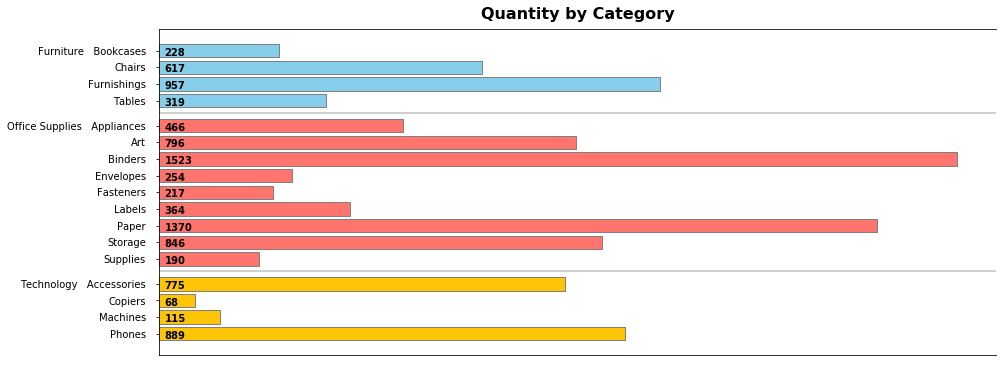

In [7]:
#hitung quantity berdasarkan category dan sub category
group_cat=data.groupby(['Category','Sub-Category']).size().reset_index(name='size')
#definisikan tempat untuk label, koordinat label, koordinat horizontal line
y_label=[]
y_pos=[]
y_line=[]
current=len(group_cat)
grouped=group_cat.groupby('Category')
#iterasi setiap grouped, ketika ganti categori index dimulai dari 0 current akan terus berkurang dan dimasukan ke 
#koordinat label
for cat,datacat in grouped:
    for idx,dat in datacat.iterrows():
        
        if idx==datacat.index[0]:
            y_label.append(f"{cat}   {dat['Sub-Category']}")
            y_pos.append(current)
            current-=1
        #tidak memberikan horizonta line pada bagian bawah
        elif idx==datacat.index[-1] and current > 0:
            y_label.append(f"{dat['Sub-Category']}")
            y_pos.append(current)
            current-=1.5
            y_line.append(current+0.75)
        else:
            y_label.append(f"{dat['Sub-Category']}")
            y_pos.append(current)
            current-=1
#membuat plot 
fig,ax=plt.subplots(figsize=(15,6))
#COLOR mapping
color={
    'Furniture':'skyblue',
    'Technology':'#FDC506',
    'Office Supplies':'#FF746C'
}
#mapping
group_cat['color']=group_cat['Category'].map(color)
#membuat barh berdasarkan posisi koodinant
for i,j,k in zip(y_pos,group_cat['size'],group_cat['color']):
    ax.barh(i,j,color=k,edgecolor='grey')
#membuat garis batas berdasarkan posisi koordinat
for i in y_line:
    ax.axhline(i,color='grey',alpha=0.5)
#placing nama label ke y axis
ax.set_yticks(y_pos)
ax.set_yticklabels(y_label)
ax.tick_params(axis='y',which='right')
ax.yaxis.set_tick_params(pad=10)
#menonaktifkan border kiri dan x axis
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
#menambah text dan judul pada masing2 bar
for i,j in zip(y_pos,group_cat['size']):
    ax.text(10,i-0.3,f"{j}",fontweight='bold')
ax.set_title('Quantity by Category',pad=10,fontsize=16,fontweight='bold')

- barang office supplies menjadi barang yang paling banyak dibeli diantara 2 jenis kategori lainnya, paloing banyak dibeli pada kategori ini  yaitu barang binder disusul kertas
- telephone menjadi barang yang paling banyak dibeli untuk teknologi sedangkan furniture barang furnishing menjadi barang yang laris dibeli